# **Divya@Narayana**

# **Project Title - Book Recommendation System**


**Problem Statement**

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).
Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.

**Content**

The Book-Crossing dataset comprises 3 files.

* Users

Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.

* Books

Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

* Ratings

Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

**Connecting to Google Drive**

In [1]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing Libraries**

In [2]:
#importing libraries required for EDA
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px 
import matplotlib.pyplot as plt
import missingno as msno
from statistics import median
from sklearn.neighbors import NearestNeighbors


# **User Dataset**

In [3]:
#loading user dataset
user_df = pd.read_csv('/content/drive/MyDrive/Unsupervised ML/Users.csv')
#first five records of user data
user_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [4]:
#size of the user dataset
user_df.shape

(278858, 3)

**Data Cleaning**

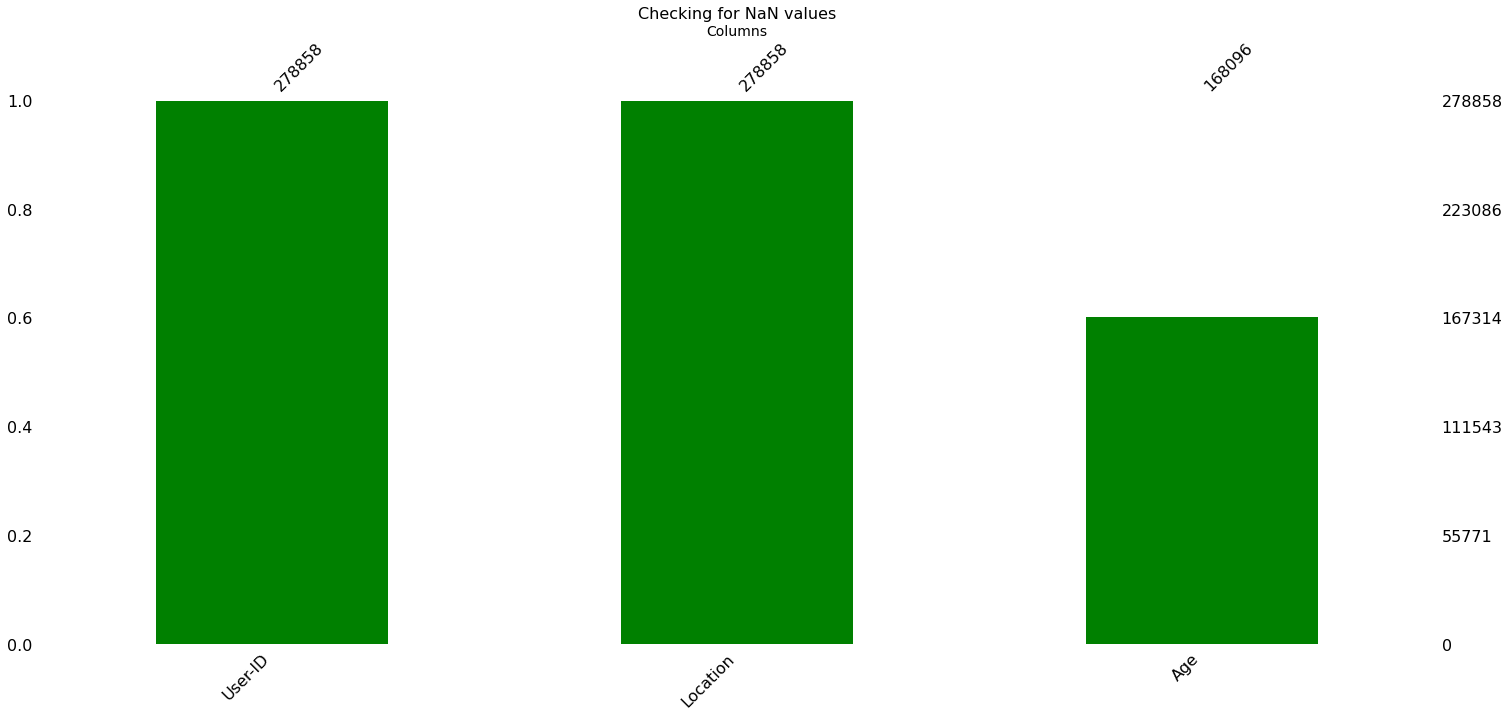

In [5]:
#checking for null values
msno.bar(user_df, color='green')
plt.title('Checking for NaN values', size=16)
plt.xlabel('Columns', size=14)
plt.show()

In [6]:
#number of null values present in the datset
user_df.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

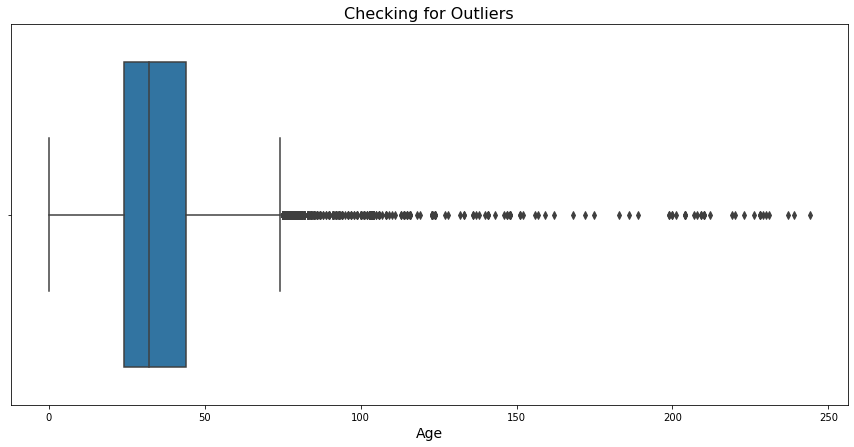

In [7]:
#checking for outliers effect
plt.figure(figsize=(15, 7))
sns.boxplot(user_df['Age'])
plt.title('Checking for Outliers', size=16)
plt.xlabel('Age', size=14)
plt.show()

In [8]:
#number of unique numbers of age
print(len(user_df['Age'].unique().tolist()))
#list of unique values of age
user_df['Age'].unique()

166


array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [9]:
#replacing the outliers with nan value
user_df.loc[(user_df.Age > 100 ) | (user_df.Age < 5),'Age']=np.nan
#first 5 records of the data
user_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


* Assuming that a user lifespan of 100 to remove the outliers effect those are replaced with mean value of the feature.

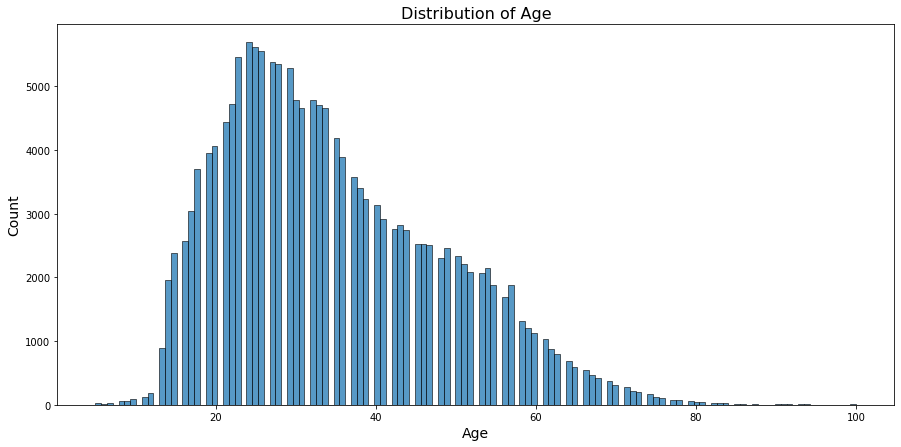

In [10]:
#histplot showing the age data
plt.figure(figsize=(15, 7))
sns.histplot(user_df['Age'])
#after replacing the outliers with nan 
plt.title('Distribution of Age', size=16)
plt.xlabel('Age', size=14)
plt.ylabel('Count', size=14)
plt.show()

In [11]:
#filling nan values with mean of the feature
user_df['Age'].fillna(round(user_df['Age'].mean()), inplace=True)
#first 5 records of the data
user_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",35.0
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",35.0
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",35.0


In [12]:
#number of unique numbers of age after cleaning
print(len(user_df['Age'].unique().tolist()))

96


In [13]:
#number of null values present in the datset after cleaning the dataset
user_df.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

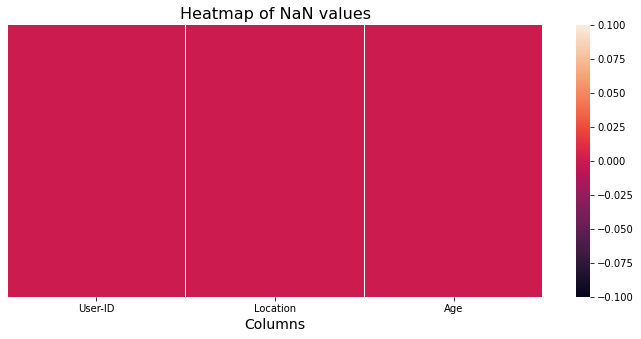

In [14]:
#heatmap of data frame showing null values
plt.figure(figsize=(12, 5))
sns.heatmap(user_df.isnull(), yticklabels=False)
plt.title('Heatmap of NaN values', size=16)
plt.xlabel('Columns', size=14)
plt.show()

**Data Visualizartion**

In [15]:
#datatype of features
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       278858 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


**Analysis on Location Feature**

In [16]:
#converting the datatype of location feature into string
user_df['Location'] = user_df['Location'].astype(str)
#dataframe after conversion
user_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",35.0
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",35.0
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",35.0


In [17]:
#analysis of location feature
reg = user_df['Location']
reg = r'(?P<City>[^,]+)\s*,\s*(?P<State>[^,]+)\s*,\s*(?P<Country>[^\s]+)'
place = user_df['Location'].str.extract(reg)
place = pd.DataFrame(place)
place.head()

,City,State,Country
0,nyc,new york,usa
1,stockton,california,usa
2,moscow,yukon territory,russia
3,porto,v.n.gaia,portugal
4,farnborough,hants,united


In [18]:
user_df = user_df.join(place)
user_df.head()

,User-ID,Location,Age,City,State,Country
0,1,"nyc, new york, usa",35.0,nyc,new york,usa
1,2,"stockton, california, usa",18.0,stockton,california,usa
2,3,"moscow, yukon territory, russia",35.0,moscow,yukon territory,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal
4,5,"farnborough, hants, united kingdom",35.0,farnborough,hants,united


In [19]:
user_df.drop('Location', axis=1, inplace=True)
user_df.head()

,User-ID,Age,City,State,Country
0,1,35.0,nyc,new york,usa
1,2,18.0,stockton,california,usa
2,3,35.0,moscow,yukon territory,russia
3,4,17.0,porto,v.n.gaia,portugal
4,5,35.0,farnborough,hants,united


In [20]:
#number of unique values 
user_df.nunique()

User-ID    278858
Age            96
City        32462
State        6199
Country      1003
dtype: int64

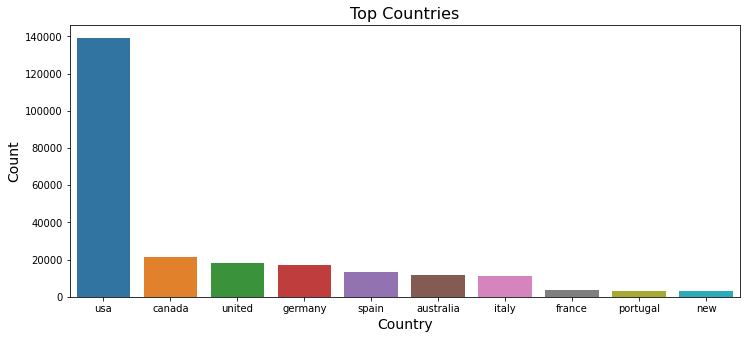

In [21]:
#dataframe of location and their counts
country = user_df['Country'].value_counts().reset_index()
country.rename(columns={'index':'Country', 'Country':'Count'}, inplace=True)
#plotting of Loacations of users
plt.figure(figsize=(12, 5))
sns.barplot(x=country['Country'][:10], y=country['Count'][:10])
plt.title('Top Countries', size=16)
plt.xlabel('Country', size=14)
plt.ylabel('Count', size=14)
plt.show()

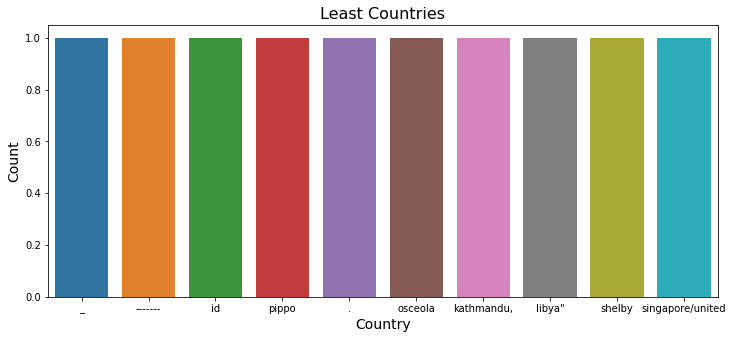

In [22]:
#plotting of Loacations of users
plt.figure(figsize=(12, 5))
sns.barplot(x=country['Country'][-10:], y=country['Count'][-10:])
plt.title('Least Countries', size=16)
plt.xlabel('Country', size=14)
plt.ylabel('Count', size=14)
plt.show()

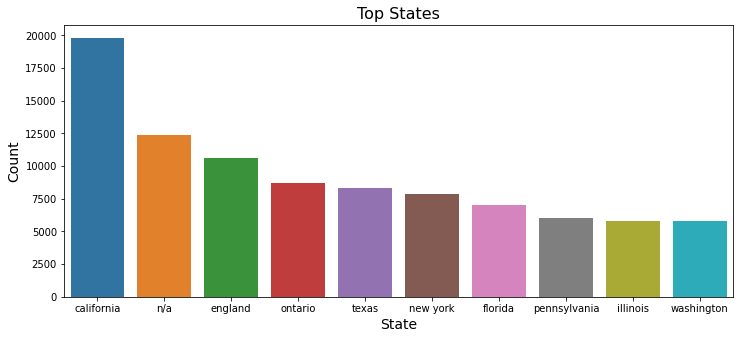

In [23]:
#dataframe of location and their counts
state = user_df['State'].value_counts().reset_index()
state.rename(columns={'index':'State', 'State':'Count'}, inplace=True)
#plotting of Loacations of users
plt.figure(figsize=(12, 5))
sns.barplot(x=state['State'][:10], y=state['Count'][:10])
plt.title('Top States', size=16)
plt.xlabel('State', size=14)
plt.ylabel('Count', size=14)
plt.show()

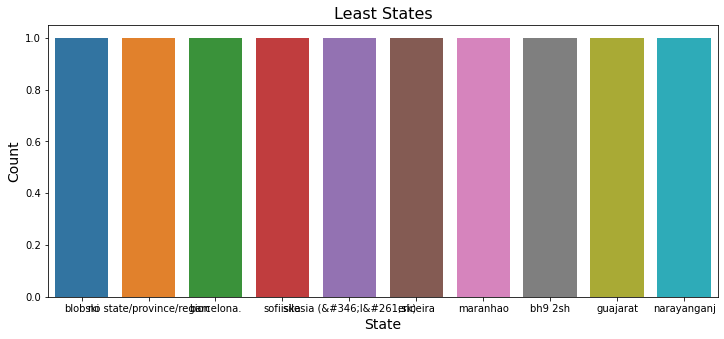

In [24]:
#dataframe of location and their counts
state = user_df['State'].value_counts().reset_index()
state.rename(columns={'index':'State', 'State':'Count'}, inplace=True)
#plotting of Loacations of users
plt.figure(figsize=(12, 5))
sns.barplot(x=state['State'][-10:], y=state['Count'][-10:])
plt.title('Least States', size=16)
plt.xlabel('State', size=14)
plt.ylabel('Count', size=14)
plt.show()

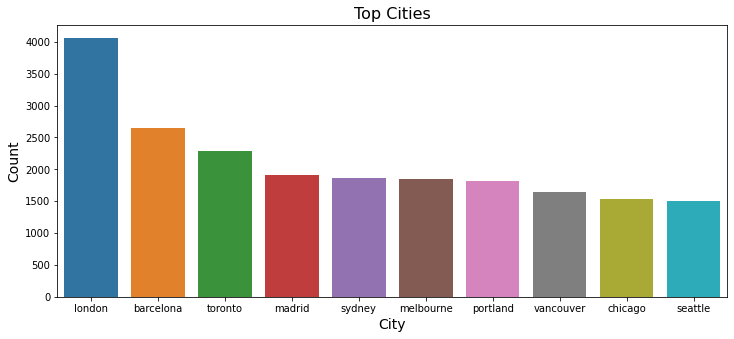

In [25]:
#dataframe of location and their counts
city = user_df['City'].value_counts().reset_index()
city.rename(columns={'index':'City', 'City':'Count'}, inplace=True)
#plotting of Loacations of users
plt.figure(figsize=(12, 5))
sns.barplot(x=city['City'][:10], y=city['Count'][:10])
plt.title('Top Cities', size=16)
plt.xlabel('City', size=14)
plt.ylabel('Count', size=14)
plt.show()

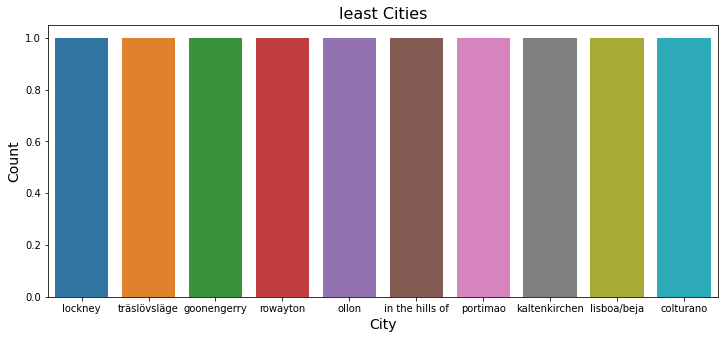

In [26]:
#dataframe of location and their counts
city = user_df['City'].value_counts().reset_index()
city.rename(columns={'index':'City', 'City':'Count'}, inplace=True)
#plotting of Loacations of users
plt.figure(figsize=(12, 5))
sns.barplot(x=city['City'][-10:], y=city['Count'][-10:])
plt.title('least Cities', size=16)
plt.xlabel('City', size=14)
plt.ylabel('Count', size=14)
plt.show()

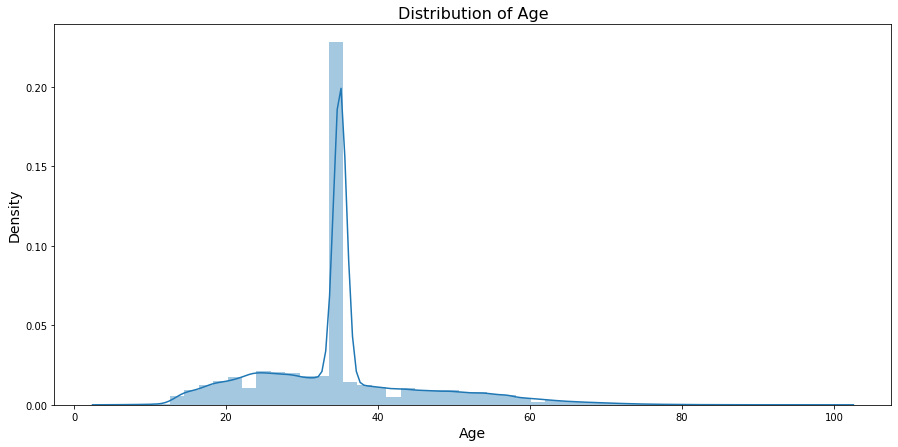

In [27]:
#plotting the time type data
plt.figure(figsize=(15, 7))
sns.distplot(user_df['Age'])
plt.title('Distribution of Age', size=16)
plt.xlabel('Age', size=14)
plt.ylabel('Density', size=14)
plt.show()

# **Books Dataset**

In [28]:
#loading book dataset
book_df = pd.read_csv('/content/drive/MyDrive/Unsupervised ML/Books.csv')
#first 5 records of the data
book_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [29]:
#size of the book dataset
book_df.shape

(271360, 8)

In [30]:
#showing the datatypes of features
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


**Data Cleaning**

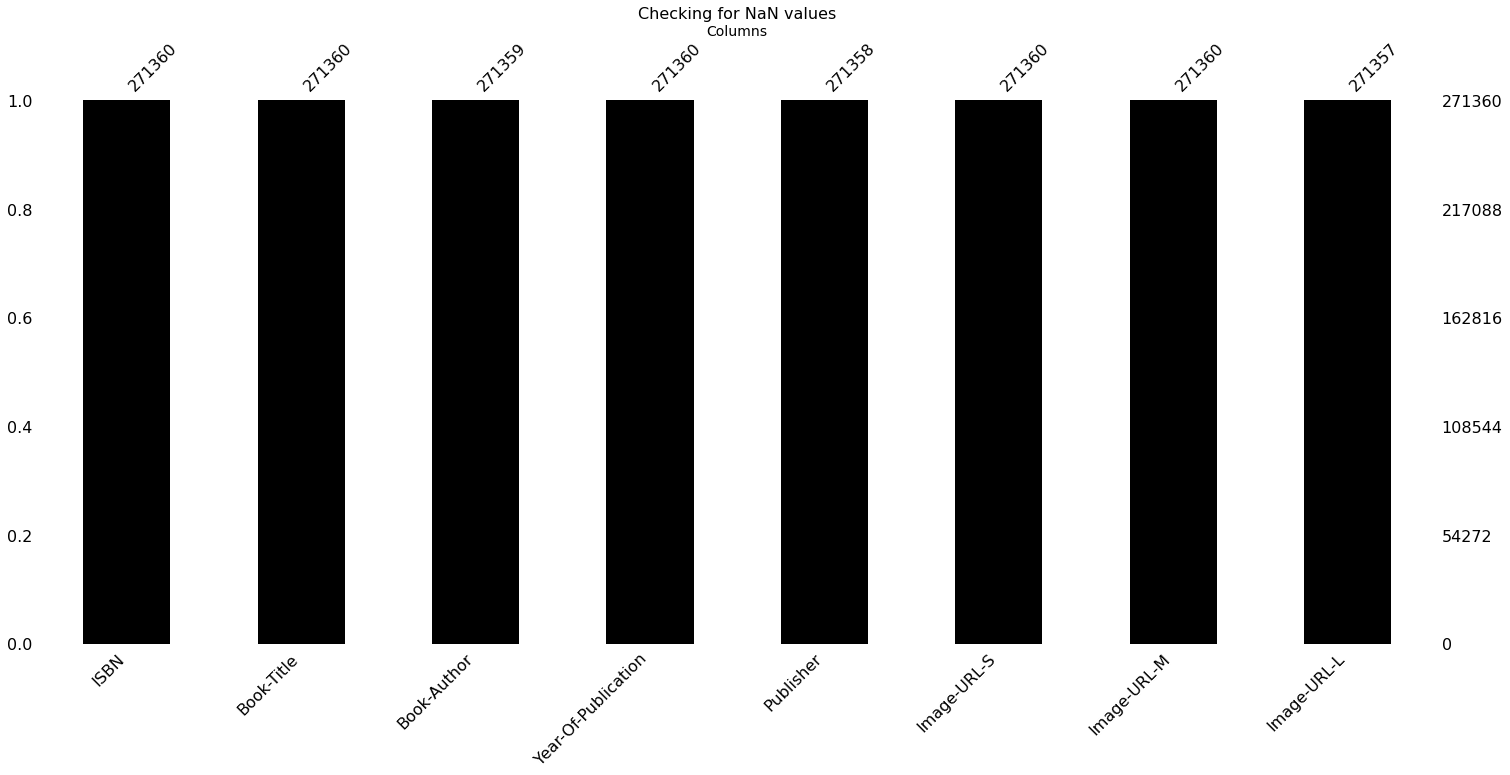

In [31]:
#checking for null values
msno.bar(book_df, color='black')
plt.title('Checking for NaN values', size=16)
plt.xlabel('Columns', size=14)
plt.show()

In [32]:
#dropping the nan values
book_df.dropna(inplace=True)

In [33]:
#size of the dataset after cleaning of null values
book_df.shape

(271354, 8)

In [34]:
#number of null values present in the datset after dropping nan values
book_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

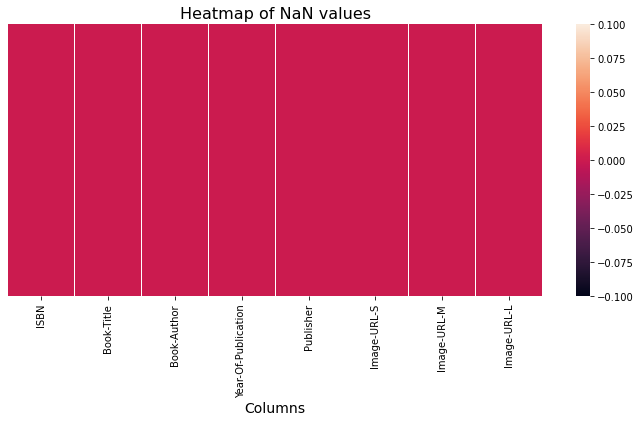

In [35]:
#heatmap of data frame showing null values
plt.figure(figsize=(12, 5))
sns.heatmap(book_df.isnull(), yticklabels=False)
plt.title('Heatmap of NaN values', size=16)
plt.xlabel('Columns', size=14)
plt.show()

**Data Visualizartion**

In [36]:
#number of unique values 
book_df.nunique()

ISBN                   271354
Book-Title             242130
Book-Author            102020
Year-Of-Publication       200
Publisher               16803
Image-URL-S            271038
Image-URL-M            271038
Image-URL-L            271038
dtype: int64

In [37]:
#dropping unwanted columns
del(book_df['Image-URL-S'])
del(book_df['Image-URL-M'])
del(book_df['Image-URL-L'])
#dataframe after dropping the unwanted features
book_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [38]:
#number of unique numbers of year of publication
print(len(book_df['Year-Of-Publication'].unique().tolist()))
#list of unique values
book_df['Year-Of-Publication'].unique()

200


array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [39]:
#removing the improper type of data
book_df = book_df[~book_df['Year-Of-Publication'].isin(['DK Publishing Inc', 'Gallimard'])]
#converting the datatype
book_df['Year-Of-Publication'] = book_df['Year-Of-Publication'].astype(np.int32)

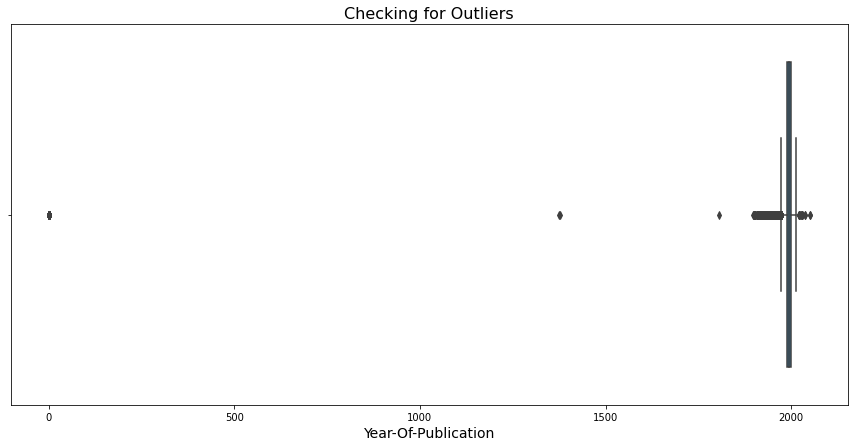

In [40]:
#checking the outliers
plt.figure(figsize=(15, 7))
sns.boxplot(book_df['Year-Of-Publication'])
plt.title('Checking for Outliers', size=16)
plt.xlabel('Year-Of-Publication', size=14)
plt.show()

In [41]:
#considering only the data upto 2021 and replacing the outliers with nan
book_df.loc[(book_df['Year-Of-Publication'] > 2021) | (book_df['Year-Of-Publication'] < 1800),'Year-Of-Publication']=np.NAN
#first 5 records of the data
book_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company


In [42]:
#year and its value counts
year = book_df['Year-Of-Publication'].value_counts().sort_index()
year.head()

1806.0    1
1897.0    1
1900.0    3
1901.0    7
1902.0    2
Name: Year-Of-Publication, dtype: int64

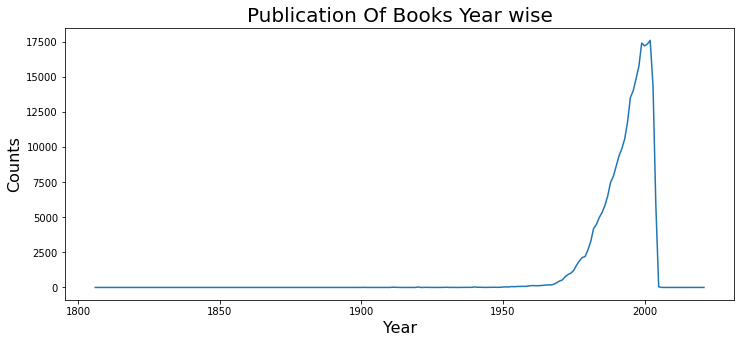

In [43]:
#plotting the Year wise publications
plt.figure(figsize=(12,5))
plt.plot(year)
plt.title("Publication Of Books Year wise", size=20)
plt.ylabel("Counts", size=16)
plt.xlabel("Year", size=16)
plt.show()

In [44]:
#replacing the nan values with the median of the data
book_df['Year-Of-Publication'].fillna(median(book_df['Year-Of-Publication']), inplace=True)
#converting the datatype
book_df['Year-Of-Publication'] = book_df['Year-Of-Publication'].astype(np.int32)
#random five records of the data
book_df.sample(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
159508,0316289590,Daniel Martin,John Fowles,1979,Bookthrift Co
44352,0345353099,Dear Dad,L. Norma Cox,1988,Ballantine Books
155655,0380808617,Turn of the Century,Jill Downie,1982,Avon Books
80722,0061051780,Journey into the Void (Sovereign Stone Trilogy...,Margaret Weis,2003,Eos
231064,0842388036,Willmington's Book of Bible Lists,H.L. Willmington,1987,Tyndale House Pub


In [45]:
#grouping the year of publication for finding their counts
year = pd.DataFrame(book_df.groupby(['Year-Of-Publication']).agg({'Year-Of-Publication':'count'}))
#random selection of 5 records of the data
year.sample(5)

,Year-Of-Publication
Year-Of-Publication,
2005,46
2003,14358
1949,11
1900,3
1904,1


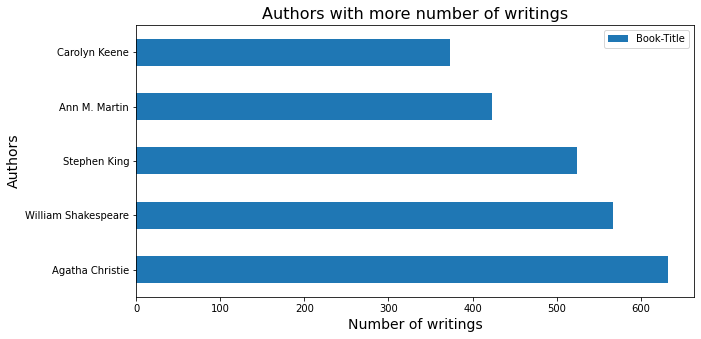

In [46]:
#dataframe of authors of the books with their value counts
author = pd.DataFrame(book_df.groupby(['Book-Author']).agg({'Book-Title':'count'})).sort_values(by='Book-Title', ascending=False)
top = author.head()
#plotting the data
top.plot(kind='barh', figsize=(10, 5))
plt.title('Authors with more number of writings', size=16)
plt.ylabel('Authors', size=14)
plt.xlabel('Number of writings', size=14)
plt.show()

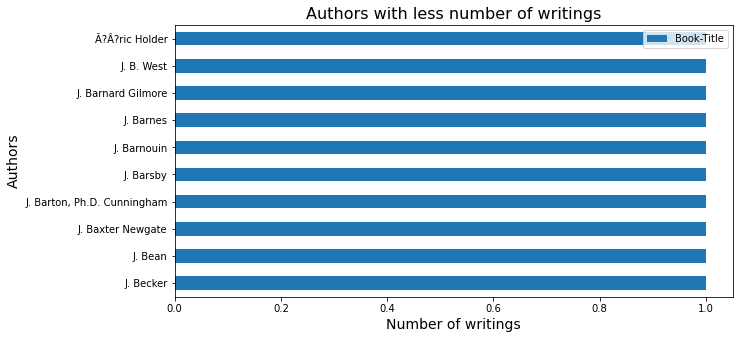

In [47]:
#plotting the least 10 authors of the data
least = author.tail(10)
least.plot(kind='barh', figsize=(10, 5))
plt.title('Authors with less number of writings', size=16)
plt.ylabel('Authors', size=14)
plt.xlabel('Number of writings', size=14)
plt.show()

In [48]:
#dataframe of books with their value counts
title = book_df['Book-Title'].value_counts().reset_index()
#changing names of the columns
title.rename(columns={'index':'Book-Title', 'Book-Title':'Count'}, inplace=True)
top = title.head(7)
#plotting the data of top read books
fig = px.pie(top, values='Count', names='Book-Title', title='Top Read Books')
fig.update_traces(textposition='inside', textinfo='value')
fig.show()

In [49]:
#least 10 books
least = title.tail(10)
least

,Book-Title,Count
242120,Man Of The Midnight Sun (Mail Order Brides) (H...,1
242121,"Time Out Amsterdam (Time Out Amsterdam Guide, ...",1
242122,The Oxford Dictionary of Popes (Oxford Paperba...,1
242123,GRAVESTONE,1
242124,L'Usage des armes,1
242125,Two For The Price Of One (Harlequin Special Ed...,1
242126,Where the Chill Waits,1
242127,Theory and practice of counseling and psychoth...,1
242128,Martian Way and Other Stories,1
242129,Facing the Music,1


In [50]:
#data frame of publisher of books and their counts
publisher = book_df['Publisher'].value_counts().reset_index()
#renaming the columns of the dataframe
publisher.rename(columns={'index':'Publisher', 'Publisher':'Count'}, inplace=True)
top = publisher.head(7)
#plotting the data of top read books
fig = px.pie(top, values='Count', names='Publisher', title='Top Publishers')
fig.update_traces(textposition='inside', textinfo='value')
fig.show()

In [51]:
least = publisher.tail()
#plotting the data of top read books
fig = px.pie(least, values='Count', names='Publisher', title='Publishers with less number of books published')
fig.update_traces(textposition='inside', textinfo='value')
fig.show()

# **Ratings Dataset**

In [52]:
#loading ratings dataset
ratings_df = pd.read_csv('/content/drive/MyDrive/Unsupervised ML/Ratings.csv')
#first 5 records of the dataset
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [53]:
#size of the ratings dataset 
ratings_df.shape

(1149780, 3)

**Data Cleaning**

In [54]:
#cosidering only the data which is same is both books and ratings dataset based on ISNB
ratings_df = ratings_df[ratings_df['ISBN'].isin(book_df['ISBN'])]
#cosidering only the data which is same is both users and ratings dataset based on User-ID
ratings_df = ratings_df[ratings_df['User-ID'].isin(user_df['User-ID'])]

In [55]:
#size of the ratings dataset after taking similar userid and isbn
ratings_df.shape

(1031129, 3)

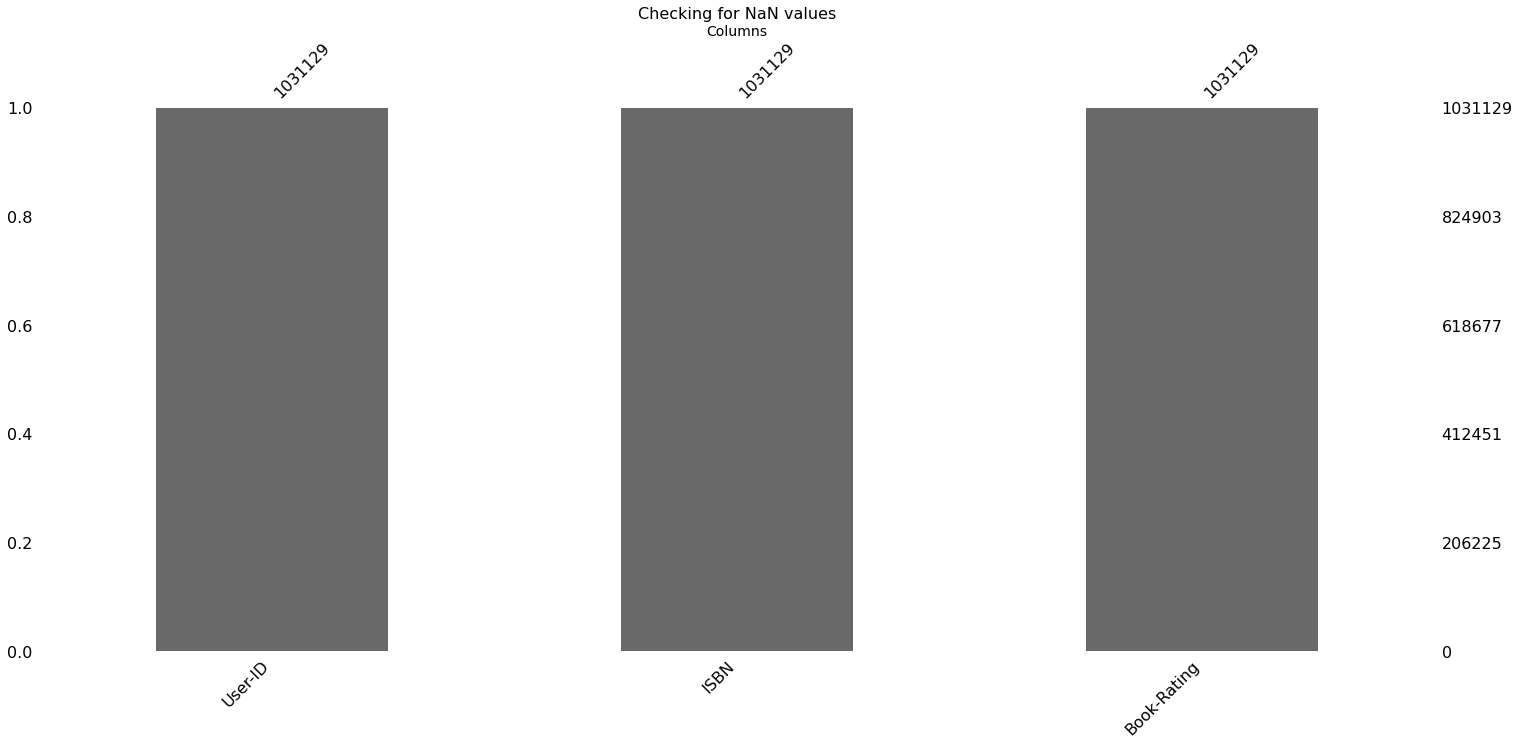

In [56]:
#checking for null values
msno.bar(ratings_df)
plt.title('Checking for NaN values', size=16)
plt.xlabel('Columns', size=14)
plt.show()

In [57]:
#null values aftr cleaning
ratings_df.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

**Data Visualization**

In [58]:
#number of unique values 
ratings_df.nunique()

User-ID         92106
ISBN           270145
Book-Rating        11
dtype: int64

In [59]:
#dataframe of book ratings and their value counts
ratings = ratings_df['Book-Rating'].value_counts().reset_index()
#renaming the names of columns
ratings.rename(columns={'index':'Book-Rating', 'Book-Rating':'Count'}, inplace=True)
#plotting the data in pie chart
fig = px.pie(ratings, values='Count', names='Book-Rating', title='Book Ratings and their percentage of data')
fig.update_traces(textposition='inside', textinfo='value')
fig.show()

In [60]:
#finding number of useres
n_users = user_df.shape[0]
#finding number of books
n_books = book_df.shape[0]
print(n_users*n_books)

75669233732


In [61]:
#calculating sparsity
sparsity = 1.0-len(ratings_df.shape)/float(n_users*n_books)
sparsity

0.9999999999735691

In [62]:
#books with 0 ratings are included
implicit = ratings_df[ratings_df['Book-Rating'] == 0]
#books with 0 ratings are excluded
explicit = ratings_df[ratings_df['Book-Rating'] != 0]

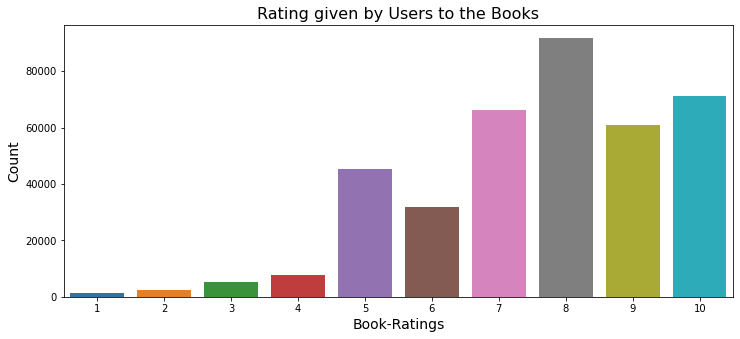

In [63]:
#plotting of ratings of users after cleaning
plt.figure(figsize=(12, 5))
sns.countplot(explicit['Book-Rating'])
plt.title('Rating given by Users to the Books', size=16)
plt.xlabel('Book-Ratings', size=14)
plt.ylabel('Count', size=14)
plt.show()

In [64]:
#frequency of users in buying book
user_count = explicit['User-ID'].value_counts()
#considering only customers who bought more than 100 books
explicit = explicit[explicit['User-ID'].isin(user_count[user_count >= 100].index)]
#frequency of book ratings
rating_count = explicit['Book-Rating'].value_counts()
#considering data only related to the above buyers and sum of rating is morethan 100
data = explicit[explicit['Book-Rating'].isin(rating_count[rating_count >= 100].index)]

In [65]:
data = data.merge(book_df, on='ISBN')
data.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
1,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
2,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
3,52584,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
4,110934,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc


In [66]:
#dataframe of book and its ratings
ratings = pd.DataFrame(data.groupby('Book-Title').sum()['Book-Rating']).sort_values(by='Book-Rating', ascending=False)
#first 5 records of the dataframe
top = ratings.head()
top

,Book-Rating
Book-Title,
Harry Potter and the Chamber of Secrets (Book 2),630
The Lovely Bones: A Novel,595
Harry Potter and the Prisoner of Azkaban (Book 3),526
Harry Potter and the Goblet of Fire (Book 4),495
Bridget Jones's Diary,470


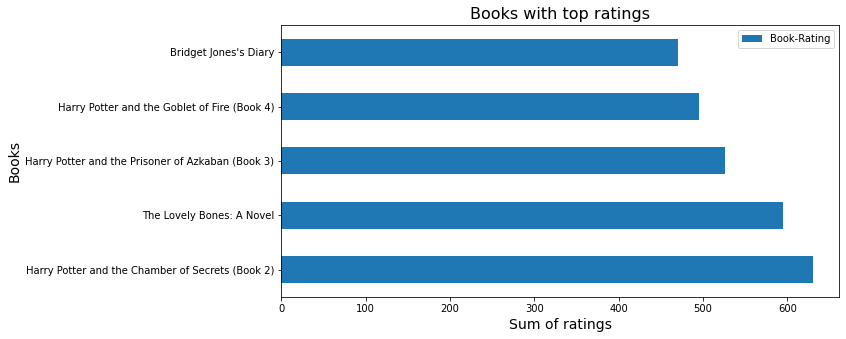

In [67]:
#visualization of books with high ratings
top.plot(kind='barh', figsize=(10, 5))
plt.title('Books with top ratings', size=16)
plt.ylabel('Books', size=14)
plt.xlabel('Sum of ratings', size=14)
plt.show()

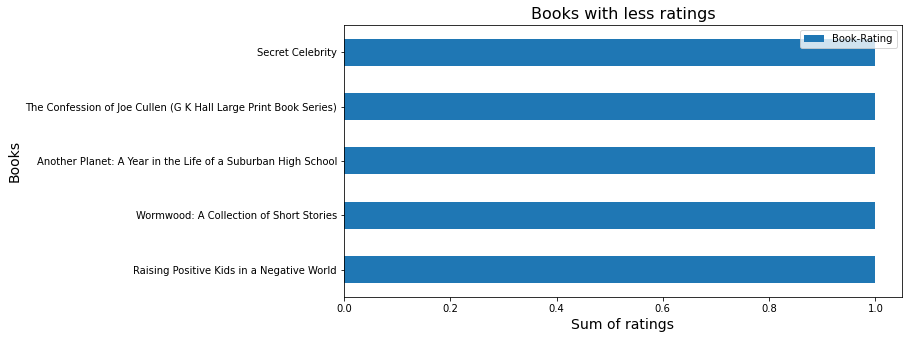

In [68]:
#visualization of books with least ratings
least = ratings.tail(5)
least.plot(kind='barh', figsize=(10, 5))
plt.title('Books with less ratings', size=16)
plt.ylabel('Books', size=14)
plt.xlabel('Sum of ratings', size=14)
plt.show()

In [69]:
#dataframe of book and its ratings
ratings = pd.DataFrame(data.groupby('Book-Title').mean()['Book-Rating'])
#first 5 records of the dataframe
ratings.head()

,Book-Rating
Book-Title,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",9.0
Dark Justice,10.0
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",9.0
Final Fantasy Anthology: Official Strategy Guide (Brady Games),10.0
"Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750",7.0


In [70]:
#dataframe of book title, its sum of ratings and number of ratings
ratings['Ratings-Count'] = pd.DataFrame(data.groupby('Book-Title').count()['Book-Rating'])
#first 5 records of the dataframe
ratings.head()

,Book-Rating,Ratings-Count
Book-Title,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",9.0,1
Dark Justice,10.0,1
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",9.0,1
Final Fantasy Anthology: Official Strategy Guide (Brady Games),10.0,1
"Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750",7.0,2


# **Recommendation Model**

**Popularity Based Recommendation Model**

In [71]:
#dataframe of paopular books based on ratings
pop_books = pd.DataFrame(data.groupby(['ISBN'])['Book-Rating'].sum())
#list of top books based on rating
top10 = pop_books.sort_values(by='Book-Rating', ascending=False).head(10)
print('Following are the top 10 Popular Books')
top10.merge(book_df, on='ISBN')

Following are the top 10 Popular Books


,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0316666343,595,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
1,059035342X,411,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books
2,043935806X,409,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic
3,0385504209,400,The Da Vinci Code,Dan Brown,2003,Doubleday
4,0312195516,375,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
5,0446310786,358,To Kill a Mockingbird,Harper Lee,1988,Little Brown &amp; Company
6,0439139597,331,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic
7,0345370775,320,Jurassic Park,Michael Crichton,1999,Ballantine Books
8,0439064864,314,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,1999,Scholastic
9,0439136350,300,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,Scholastic


In [72]:
#building the recommendation model
book_matrix = data.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating')
userid = book_matrix.index
book_title = book_matrix.columns
#print the output
book_matrix

Book-Title,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",Dark Justice,"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",Final Fantasy Anthology: Official Strategy Guide (Brady Games),"Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750",Highland Desire (Zebra Splendor Historical Romances),"Little Comic Shop of Horrors (Give Yourself Goosebumps, Book 17)",Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),Nonbook Materials: The Organization of Integrated Collections,"Q-Space (Star Trek The Next Generation, Book 47)","Q-Zone (Star Trek The Next Generation, Book 48)","Summonings: Books of Magic, Vol. 2","The Secret of the Old Clock (Nancy Drew, Book 1)",This Place Has No Atmosphere (Laurel-Leaf Books),Travel Companion Chile and Easter Island (Travel Companion),Weird News Stories,the Devil Will Drag You Under,!%@ (A Nutshell handbook),!Arriba! Comunicacion y cultura,"!Trato hecho!: Spanish for Real Life, Combined Edition",!Yo!,$14 In The Bank (Cathy Collection),' Mein verwundetes Herz'. Das Leben der Lilli Jahn 1900 - 1944.,'A Hell of a Place to Lose a Cow': An American Hitchhiking Odyssey,'Eine gute Frau hat keinen Kopf'. EuropÃ?Â¤ische SprichwÃ?Â¶rter Ã?Â¼ber Frauen.,'G' Is for Grafton : The World of Kinsey Millhone,"'Isms: a dictionary of words ending in -ism, -ology, and -phobia,: With some similar terms, arranged in subject order",'N Sync,'Salem's Lot,'Til Death Do Us Part,'Til There Was You,'Tis Herself : A Memoir,"'Tis The Season (Harlequin Historical Series, No. 583)",'Twas The Night (Harlequin Desire No 684),--y los 40 ladrones (ColecciÃ³n FÃ¡bula),...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,...And Ladies of the Club,".Hack: //Legend of the Twilight, Vol. 1",".Hack: //Legend of the Twilight, Vol. 2",01-01-00: A Novel of the Millennium,...,"\The House of Cthulhu\"" and Other Tales""","\The Little Mermaid\"" and Other Fairy Tales (Penguin Children's 60s)""","\There I Was ... Flat on My Back\""""","\Unsinkable\"": The Full Story of the RMS Titanic""","\What Do You Care What Other People Think?\"": Further Adventures of a Curious Character""","\What do you mean, I still don't have equal rights??!\"" (Andrews and McMeel treasury series)""","\Why Are All the Black Kids Sitting Together in the Cafeteria?\"": And Other Conversations About Race""","\Why Do We Gotta Do This Stuff, Mr. Nehring?\"": Notes from a Teacher's Day in School""","\You'll Never Nanny in This Town Again!\"": The Adventures and Misadventures of a Hollywood Nanny""",and the shadows took him : A Novel,christmas on snowbird mountain,dBASE IV Version 1.5/2.0 for Business,"de Acuerdo, Jeeves",de Amor y de Sombra - Bolsillo,de Que Hablamos Cuando Hablamos de Amor,del Otro Lado del Arbol,dirty linen,dtv - Atlas Weltgeschichte 2. Von der FranzÃ?Â¶sischen Revolution bis zur Gegenwart.,e,flambeau@darkcorp.com,good girls do: Sex Chronicles of a Shameless Generation,little town on the prairie (little house) (little town on the Prairie),one hundred years of solitude,operation : mistletoe (the special agents),schÃ?Â¶ner wohnen.doc. Ein WG- Roman.,sed &amp; awk (2nd Edition),sharks (reading discovery),stardust,"street bible, the",termcap &amp; terminfo (O'Reilly Nutshell),the Dark Light Years,them (Modern Library),together by christmas,"wet sand, raven tracks",whataboutrick.com: a poetic tribute to Richard A. Ricci,why I'm like this : True Stories,"Â¡Corre, perro, corre!",Â¿Eres tu mi mamÃ¡?/Are You My Mother?,Ã?ngeles fugaces (Falling Angels),Ã?Â?ber das Fernsehen.
User-ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [73]:
#size of the matrix build
book_matrix.shape

(449, 61648)

In [74]:
#filling the nan values with 0 in the correlation matrix
book_matrix.fillna(0, inplace=True)
#changing the datatype
book_matrix = book_matrix.astype(np.int32)
#first 5 recods of the data
book_matrix.head()

Book-Title,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",Dark Justice,"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",Final Fantasy Anthology: Official Strategy Guide (Brady Games),"Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750",Highland Desire (Zebra Splendor Historical Romances),"Little Comic Shop of Horrors (Give Yourself Goosebumps, Book 17)",Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),Nonbook Materials: The Organization of Integrated Collections,"Q-Space (Star Trek The Next Generation, Book 47)","Q-Zone (Star Trek The Next Generation, Book 48)","Summonings: Books of Magic, Vol. 2","The Secret of the Old Clock (Nancy Drew, Book 1)",This Place Has No Atmosphere (Laurel-Leaf Books),Travel Companion Chile and Easter Island (Travel Companion),Weird News Stories,the Devil Will Drag You Under,!%@ (A Nutshell handbook),!Arriba! Comunicacion y cultura,"!Trato hecho!: Spanish for Real Life, Combined Edition",!Yo!,$14 In The Bank (Cathy Collection),' Mein verwundetes Herz'. Das Leben der Lilli Jahn 1900 - 1944.,'A Hell of a Place to Lose a Cow': An American Hitchhiking Odyssey,'Eine gute Frau hat keinen Kopf'. EuropÃ?Â¤ische SprichwÃ?Â¶rter Ã?Â¼ber Frauen.,'G' Is for Grafton : The World of Kinsey Millhone,"'Isms: a dictionary of words ending in -ism, -ology, and -phobia,: With some similar terms, arranged in subject order",'N Sync,'Salem's Lot,'Til Death Do Us Part,'Til There Was You,'Tis Herself : A Memoir,"'Tis The Season (Harlequin Historical Series, No. 583)",'Twas The Night (Harlequin Desire No 684),--y los 40 ladrones (ColecciÃ³n FÃ¡bula),...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,...And Ladies of the Club,".Hack: //Legend of the Twilight, Vol. 1",".Hack: //Legend of the Twilight, Vol. 2",01-01-00: A Novel of the Millennium,...,"\The House of Cthulhu\"" and Other Tales""","\The Little Mermaid\"" and Other Fairy Tales (Penguin Children's 60s)""","\There I Was ... Flat on My Back\""""","\Unsinkable\"": The Full Story of the RMS Titanic""","\What Do You Care What Other People Think?\"": Further Adventures of a Curious Character""","\What do you mean, I still don't have equal rights??!\"" (Andrews and McMeel treasury series)""","\Why Are All the Black Kids Sitting Together in the Cafeteria?\"": And Other Conversations About Race""","\Why Do We Gotta Do This Stuff, Mr. Nehring?\"": Notes from a Teacher's Day in School""","\You'll Never Nanny in This Town Again!\"": The Adventures and Misadventures of a Hollywood Nanny""",and the shadows took him : A Novel,christmas on snowbird mountain,dBASE IV Version 1.5/2.0 for Business,"de Acuerdo, Jeeves",de Amor y de Sombra - Bolsillo,de Que Hablamos Cuando Hablamos de Amor,del Otro Lado del Arbol,dirty linen,dtv - Atlas Weltgeschichte 2. Von der FranzÃ?Â¶sischen Revolution bis zur Gegenwart.,e,flambeau@darkcorp.com,good girls do: Sex Chronicles of a Shameless Generation,little town on the prairie (little house) (little town on the Prairie),one hundred years of solitude,operation : mistletoe (the special agents),schÃ?Â¶ner wohnen.doc. Ein WG- Roman.,sed &amp; awk (2nd Edition),sharks (reading discovery),stardust,"street bible, the",termcap &amp; terminfo (O'Reilly Nutshell),the Dark Light Years,them (Modern Library),together by christmas,"wet sand, raven tracks",whataboutrick.com: a poetic tribute to Richard A. Ricci,why I'm like this : True Stories,"Â¡Corre, perro, corre!",Â¿Eres tu mi mamÃ¡?/Are You My Mother?,Ã?ngeles fugaces (Falling Angels),Ã?Â?ber das Fernsehen.
User-ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2033,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [75]:
#checking the model
wild_animus = book_matrix['Wild Animus']
#print the output
wild_animus.head()

User-ID
2033    0
2110    0
2276    0
4017    0
4385    0
Name: Wild Animus, dtype: int32

**Model Implementation**

In [76]:
#finding number of useres
n_users = book_matrix.shape[0]
#finding number of books
n_books = book_matrix.shape[1]

In [77]:
#calculating sparsity
sparsity = 1.0-len(data.shape)/float(n_users*n_books)
sparsity

0.9999999277455395

In [78]:
#defining metric and k values as global which means metric an k values are fixed all over the noverbook
global metric, k
metric = 'cosine'
k = 10

**User Based Recommendation**

In [79]:
#function to find 10 similar users with given user_id and ratings
def similarusers(user_id, ratings, metric = metric, k=k):
    similarities=[]
    indices=[]
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute') 
    model_knn.fit(ratings)
    loc = ratings.index.get_loc(user_id)
    distances, indices = model_knn.kneighbors(ratings.iloc[loc, :].values.reshape(1, -1), n_neighbors = k+1)
    similarities = 1-distances.flatten()
       
    return similarities,indices

In [80]:
#This function predicts rating for specified user-item combination based on user-based approach
def predict_user(user_id, book_title, ratings, metric = metric, k=k):
    prediction=0
    user_loc = ratings.index.get_loc(user_id)
    title_loc = ratings.columns.get_loc(book_title)    
    similarities, indices=similarusers(user_id, ratings,metric, k)
    mean_rating = ratings.iloc[user_loc,:].mean() 
    weighted_sum = np.sum(similarities)-1
    product=1
    wtd_sum = 0 
    
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i] == user_id:
            continue;
        else: 
            ratings_diff = ratings.iloc[indices.flatten()[i],title_loc]-np.mean(ratings.iloc[indices.flatten()[i],:])
            product = ratings_diff * (similarities[i])
            wtd_sum = wtd_sum + product
        
    if prediction <= 0:
        prediction = 1
    elif prediction > 10:
        prediction = 0
    
    prediction = int(round(mean_rating + (wtd_sum/weighted_sum)))
    print ('\nPredicted rating for user {0} -> item {1}: {2}'.format(user_id,book_title, prediction))

    return prediction

In [81]:
predict_user(11676, 'Legacy', book_matrix)


Predicted rating for user 11676 -> item Legacy: 7


7

In [82]:
predict_user(4017, 'Life of Pi', book_matrix)


Predicted rating for user 4017 -> item Life of Pi: 3


3

**Item Based Recommendation**

In [83]:
#function for finding the similar book for the user
def rec_book(book_name):
    #applying the function on dataset
    data = book_matrix[book_name]
    #finding the similar book
    similar_to_book_name = book_matrix.corrwith(data)
    #dataframe of similar book with the correlation result
    corr_book_name = pd.DataFrame(similar_to_book_name, columns=['Correlation'])
    #dropping null values and cleaning the dataframe
    corr_book_name.dropna(inplace=True)
    #adding the count of ratings given by users
    corr_book_name = corr_book_name.join(ratings['Ratings-Count'])
    #dataframe of similar book with their counts of ratings with morethan 50 and correlation result
    result = corr_book_name[corr_book_name['Ratings-Count'] > 50].sort_values('Correlation', ascending=False)
    
    return result 

In [84]:
#similar books recommended by the model
rec_book('Life of Pi').head(10)

,Correlation,Ratings-Count
Book-Title,,
The Lovely Bones: A Novel,0.209224,71
To Kill a Mockingbird,0.136422,52
The Da Vinci Code,0.097563,51
Bridget Jones's Diary,0.061692,64
Harry Potter and the Chamber of Secrets (Book 2),0.031317,72
Harry Potter and the Prisoner of Azkaban (Book 3),0.027233,58
Harry Potter and the Goblet of Fire (Book 4),-0.039437,54


In [85]:
#similar books recommended by the model
rec_book('Legacy').head(10)

,Correlation,Ratings-Count
Book-Title,,
Harry Potter and the Goblet of Fire (Book 4),0.096417,54
Harry Potter and the Prisoner of Azkaban (Book 3),0.076245,58
The Lovely Bones: A Novel,0.040882,71
The Da Vinci Code,0.024978,51
To Kill a Mockingbird,0.022518,52
Harry Potter and the Chamber of Secrets (Book 2),0.009635,72
Bridget Jones's Diary,0.007517,64
